In [41]:
# neural network with keras tutorial
from tensorflow import keras
from tensorflow.keras import layers
import keras.optimizers as opt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

In [43]:
# define the keras model
model = Sequential(name='My_sequential')
model.add(Dense(12, input_dim=8, activation='relu', name='layer1'))
model.add(Dense(8, activation='relu', name='layer2'))
model.add(Dense(1, activation='sigmoid', name='output_layer'))

In [44]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
# fit the keras model on the dataset. MINI-BATCH GRADIENT DESCENT
history = model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 1ms/step - loss: 6.7119 - accuracy: 0.6497
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 1.4934 - accuracy: 0.5234
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8693 - accuracy: 0.5625
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7687 - accuracy: 0.5755
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7294 - accuracy: 0.6276
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6875 - accuracy: 0.6302
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.6094
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6511 - accuracy: 0.6341
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.6602
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6287 - accuracy: 0.6445
Epoch 11/

77/77 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 0.7135
Epoch 84/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.7214
Epoch 85/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.7109
Epoch 86/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.7214
Epoch 87/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.7240
Epoch 88/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.7201
Epoch 89/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5545 - accuracy: 0.7096
Epoch 90/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7279
Epoch 91/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5400 - accuracy: 0.7331
Epoch 92/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.7096
Epoch 93/150


In [46]:
# fit the keras model on the dataset. BATCH GRADIENT DESCENT
history = model.fit(X, y, epochs=150, batch_size=len(dataset), verbose=0)

In [47]:
# fit the keras model on the dataset. SGT (STOCHASTIC GRADIENT DESCENT)
history = model.fit(X, y, epochs=150, batch_size=1, verbose=0)

In [48]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


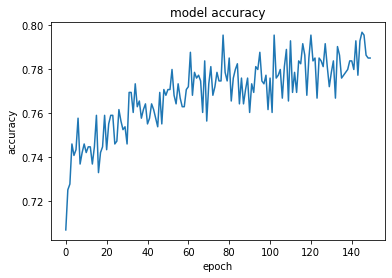

In [49]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [50]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.08


In [11]:
# fit the keras model on the dataset without progress bars
model.fit(X, y, epochs=150, batch_size=10, verbose=0)
# evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=0)

In [51]:
# make probability predictions with the model
predictions = model.predict(X)
classes_x=np.argmax(predictions,axis=1)
# round predictions 
rounded = [round(x[0]) for x in predictions]

In [52]:
# summarize the dataset
for i in range(len(dataset)):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 0 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0] => 0 (expected 0)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0] => 0 (expected 1)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0] => 0 (expected 0)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => 1 (expected 1)
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0] => 0 (expect

In [53]:
#2nd variant : Linear Regression. Predicting age
X = dataset[:,0:7]
y = dataset[:,7]

In [54]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [55]:
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer = opt, metrics=['mae'])

In [56]:
dataset.shape

(768, 9)

In [57]:
# fit the keras model on the dataset
model.fit(X, y, epochs=50, batch_size=10)

Epoch 1/50
77/77 [==============================] - 0s 1ms/step - loss: 537.8588 - mae: 14.8726
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 124.6130 - mae: 8.4103
Epoch 3/50
77/77 [==============================] - 0s 1ms/step - loss: 114.9783 - mae: 8.1202
Epoch 4/50
77/77 [==============================] - 0s 1ms/step - loss: 104.7196 - mae: 7.5335
Epoch 5/50
77/77 [==============================] - 0s 1ms/step - loss: 98.9238 - mae: 7.1277
Epoch 6/50
77/77 [==============================] - 0s 1ms/step - loss: 97.5537 - mae: 7.2067
Epoch 7/50
77/77 [==============================] - 0s 1ms/step - loss: 105.6470 - mae: 7.4205
Epoch 8/50
77/77 [==============================] - 0s 1ms/step - loss: 97.2485 - mae: 7.0536
Epoch 9/50
77/77 [==============================] - 0s 1ms/step - loss: 90.9764 - mae: 6.8998
Epoch 10/50
77/77 [==============================] - 0s 1ms/step - loss: 89.8898 - mae: 6.7399
Epoch 11/50
77/77 [==============================] - 

In [58]:
# make probability predictions with the model
predictions = model.predict(X)
classes_x=np.argmax(predictions,axis=1)
# round predictions 
rounded = [round(x[0]) for x in predictions]

In [59]:
# summarize the first 5 cases/dataset
for i in range(len(dataset)):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627] => 35 (expected 50)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351] => 24 (expected 31)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672] => 42 (expected 32)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167] => 21 (expected 21)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288] => 27 (expected 33)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201] => 36 (expected 30)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248] => 23 (expected 26)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134] => 30 (expected 29)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158] => 31 (expected 53)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232] => 48 (expected 54)
[4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191] => 37 (expected 30)
[10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537] => 43 (expected 34)
[10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441] => 47 (expected 57)
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398] => 34 (expected 59)
[5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587] => 35 (expected 51)
[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484] => 26 (expect